In [4]:
#Import useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [5]:
#Import Data
df=pd.read_csv('spamraw.csv')
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [6]:
#Exploratory Data Analysis (EDA)
df.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [7]:
#get/extract spam messages from dataset
spam_messages=df[df['type']=='spam']
spam_messages.head() #show only 5 spam messages

,type,text
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
8,spam,Marvel Mobile Play the official Ultimate Spide...
19,spam,U can WIN £100 of Music Gift Vouchers every we...
34,spam,U have won a nokia 6230 plus a free digital ca...


In [8]:
#finding the count and unique message count of spam messages
spam_messages.describe()

,type,text
count,747,747
unique,1,653
top,spam,Please call our customer service representativ...
freq,747,4


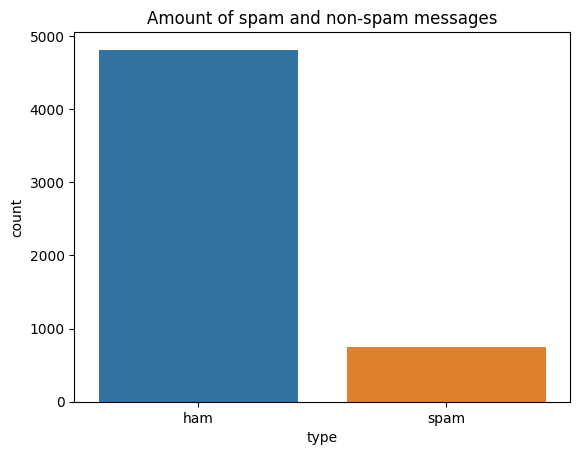

In [9]:
#plot the non-spam messages in a countplot vs the spam messages
sns.countplot(data=df,x=df["type"]).set_title('Amount of spam and non-spam messages')
plt.show()

In [19]:
#Splitting the SMS data into Test and Train data
X_train,X_test,Y_train,Y_test=train_test_split(df.text,df.type,test_size=0.2,random_state=0)
print("X_train,Y_train:",X_train.shape,Y_train.shape)
print("X_test,Y_test:",X_test.shape,Y_test.shape)

X_train,Y_train: (4447,) (4447,)
X_test,Y_test: (1112,) (1112,)


In [31]:
#Extracting and Count Vectorizing
vectorizer=CountVectorizer()
data_train_count=vectorizer.fit_transform(X_train)
data_test_count=vectorizer.transform(X_test)

In [32]:
#Modelling and training
clf=MultinomialNB()
clf.fit(data_train_count,Y_train)
predictions=clf.predict(data_test_count)

In [34]:
print("accuracy_score:",accuracy_score(Y_test,predictions))

accuracy_score: 0.9901079136690647


In [35]:
print("confusion_matrix:",confusion_matrix(Y_test,predictions))

confusion_matrix: [[979   0]
 [ 11 122]]
